In [4]:
import torch
import weightwatcher as ww
import transformers
from transformers import OpenAIGPTModel, GPT2Model
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Load Pre-Trained Models

In [5]:
gpt_model = OpenAIGPTModel.from_pretrained('openai-gpt')
gpt_model.eval()

gpt2_model = GPT2Model.from_pretrained('gpt2')
gpt2_model.eval()

INFO:filelock:Lock 140625151629520 acquired on /Users/jonathan_novak/.cache/huggingface/transformers/bebb46f5735701bc248ef9faa26f12577944fa7fc8e9be1a774b94d4cb8b79b6.ba6f10a5446f364b92311c09e55e49aa27024a4aeefc1ea50fd733b77bcd997d.lock


Downloading:   0%|          | 0.00/656 [00:00<?, ?B/s]

INFO:filelock:Lock 140625151629520 released on /Users/jonathan_novak/.cache/huggingface/transformers/bebb46f5735701bc248ef9faa26f12577944fa7fc8e9be1a774b94d4cb8b79b6.ba6f10a5446f364b92311c09e55e49aa27024a4aeefc1ea50fd733b77bcd997d.lock
INFO:filelock:Lock 140625154358608 acquired on /Users/jonathan_novak/.cache/huggingface/transformers/3e867ce638da986403594a5acbb39846ecb9c3b360a3b526348dd54b06938e55.93527980a112896731f93175b7c1cbc6b0fd771fad85fcc777ff5d49d249782e.lock


Downloading:   0%|          | 0.00/479M [00:00<?, ?B/s]

INFO:filelock:Lock 140625154358608 released on /Users/jonathan_novak/.cache/huggingface/transformers/3e867ce638da986403594a5acbb39846ecb9c3b360a3b526348dd54b06938e55.93527980a112896731f93175b7c1cbc6b0fd771fad85fcc777ff5d49d249782e.lock
INFO:filelock:Lock 140624286445200 acquired on /Users/jonathan_novak/.cache/huggingface/transformers/fc674cd6907b4c9e933cb42d67662436b89fa9540a1f40d7c919d0109289ad01.7d2e0efa5ca20cef4fb199382111e9d3ad96fd77b849e1d4bed13a66e1336f51.lock


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

INFO:filelock:Lock 140624286445200 released on /Users/jonathan_novak/.cache/huggingface/transformers/fc674cd6907b4c9e933cb42d67662436b89fa9540a1f40d7c919d0109289ad01.7d2e0efa5ca20cef4fb199382111e9d3ad96fd77b849e1d4bed13a66e1336f51.lock
INFO:filelock:Lock 140624286444816 acquired on /Users/jonathan_novak/.cache/huggingface/transformers/752929ace039baa8ef70fe21cdf9ab9445773d20e733cf693d667982e210837e.323c769945a351daa25546176f8208b3004b6f563438a7603e7932bae9025925.lock


Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

INFO:filelock:Lock 140624286444816 released on /Users/jonathan_novak/.cache/huggingface/transformers/752929ace039baa8ef70fe21cdf9ab9445773d20e733cf693d667982e210837e.323c769945a351daa25546176f8208b3004b6f563438a7603e7932bae9025925.lock


GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0): GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (1): GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP

# Analyze Models via WeightWatcher
To analyze the DNN without the training or testing data, we use alpha from the Power Law metric for each layer and evaluate the distribution using a histogram.

#### Resources:
* [How to Tell if You Have Trained Your Model with Enough Data](https://www.kdnuggets.com/2021/07/tell-model-trained-enough-data.html)
* [Is Your Model Overtrained?](https://calculatedcontent.com/2021/04/04/are-your-models-overtrained/)
* [Power Laws in Deep Learning](https://www.kdnuggets.com/2018/09/power-laws-deep-learning.html)
* [Power Laws in Deep Learning 2: Universality](https://www.kdnuggets.com/2018/09/power-laws-deep-learning-2-universality.html)

In [6]:
watcher = ww.WeightWatcher(model=gpt_model)
gpt_details = watcher.analyze()

INFO:weightwatcher:

python      version 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.21.1
tensforflow version 2.5.0
keras       version 2.5.0
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savefig': False, 'rescale': True, 'deltas': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'ww2x': False, 'deltaEs': False}
INFO:weightwatcher:Layer id 1  unknown type 32 layer  Embedding(40478, 768)
INFO:weightwatcher:Layer id 2  unknown type 32 layer  Embedding(512, 768)
INFO:weightwatcher:LAYER: 7 4  : <class 'transformers.modeling_utils.Conv1D'>
/Users/jonathan_novak/PycharmProjects/hello-world-weightwatcher/venv-ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/jonathan_novak/PycharmProjects/hello-world-weightwatcher/venv-ww/lib/python3.7/site-pa

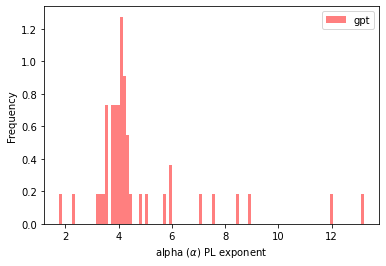

In [7]:
gpt_details.alpha.plot.hist(bins=100, color='red', alpha=0.5, density=True, label='gpt')
plt.xlabel(r"alpha $(\alpha)$ PL exponent")
plt.legend()

**Conclusion**: The alphas for the GPT model peaks at 4 which is not optimal and there are several outlier layers (alpha>6)

In [8]:
watcher = ww.WeightWatcher(model=gpt2_model)
gpt2_details = watcher.analyze()

INFO:weightwatcher:

python      version 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.21.1
tensforflow version 2.5.0
keras       version 2.5.0
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savefig': False, 'rescale': True, 'deltas': False, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'ww2x': False, 'deltaEs': False}
INFO:weightwatcher:Layer id 1  unknown type 32 layer  Embedding(50257, 768)
INFO:weightwatcher:Layer id 2  unknown type 32 layer  Embedding(1024, 768)
INFO:weightwatcher:Layer id 6  Layer norm has no matrices
INFO:weightwatcher:LAYER: 8 4  : <class 'transformers.modeling_utils.Conv1D'>
INFO:weightwatcher:LAYER: 9 4  : <class 'transformers.modeling_utils.Conv1D'>
INFO:weightwatcher:Layer id 12  Layer norm has no matrices
INFO:weightwatcher:LAYER: 14 4  : <class 'transformers.modeling_utils.Conv1D'>
INFO:weightwatcher:LAYER: 15 4  : <cl

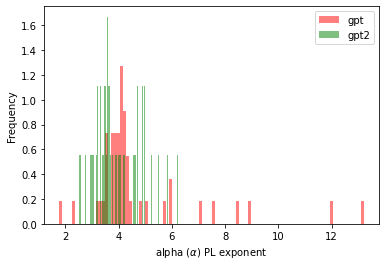

In [9]:
gpt_details.alpha.plot.hist(bins=100, color='red', alpha=0.5, density=True, label='gpt')
gpt2_details.alpha.plot.hist(bins=100, color='green', alpha=0.5, density=True, label='gpt2')
plt.xlabel(r"alpha $(\alpha)$ PL exponent")
plt.legend()

**Conclusion**: The alphas for the GPT2 model is most frequent around 3.5 and the outliers are reduced significantly compared to the GPT model